In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
file_path = 'data/'+'_auditory_dur_estimate_2025-01-08_16h34.13.197.csv'
data = pd.read_csv(file_path)
data['chose_test'] = (data['responses'] == data['order']).astype(int)
data[:3]

,Unnamed: 0,standard_dur,rise_dur,order,pre_dur,post_dur,isi_dur,trial_num,total_audio_dur,delta_dur_percents,...,test_dur_s,intensities,current_stair,responses,is_correct,response_rts,stair_num_reversal,stair_is_reversal,response_keys,chose_test
0,0,1.75,0.05,2.0,0.251861,0.229821,0.271819,0,4.165986,-0.05,...,1.6625,5,3U1D,1.0,True,1.851130,0,False,left,0
1,1,1.75,0.05,2.0,0.149353,0.268586,0.251642,1,4.082041,-0.05,...,1.6625,5,2U1D,2.0,False,2.083310,0,False,right,1
2,2,1.50,0.05,1.0,0.374113,0.326546,0.223208,2,5.123832,0.80,...,2.7000,5,lapse_rate,1.0,True,0.665171,0,False,left,1


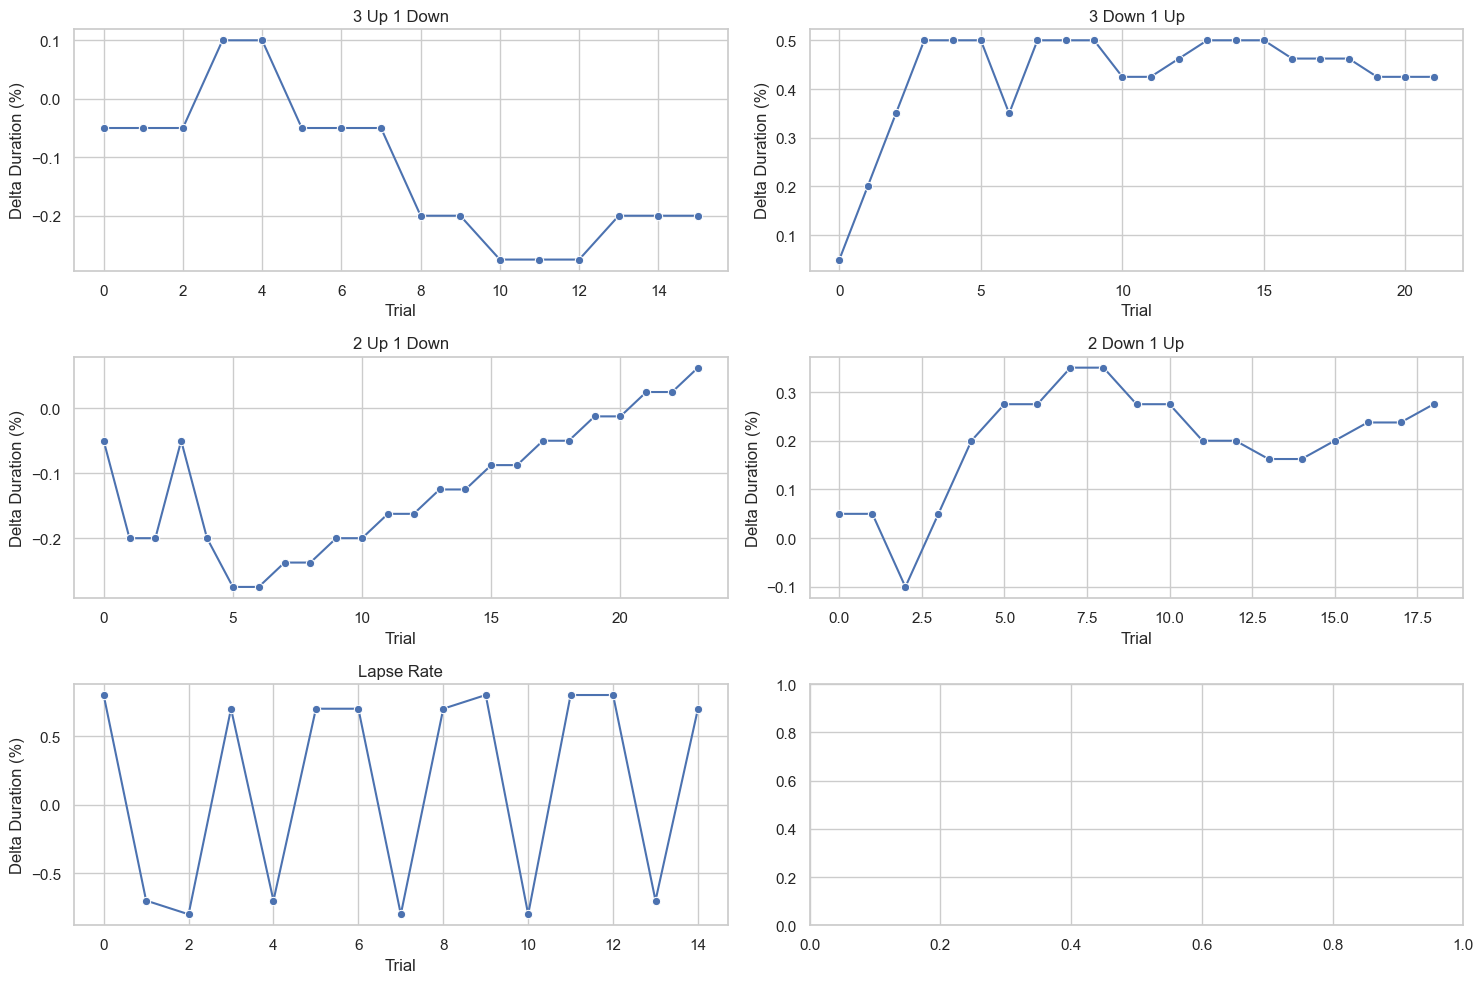

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Define the stair types and titles
stair_types = ['3U1D', '3D1U', '2U1D', '2D1U', 'lapse_rate']
titles = ['3 Up 1 Down', '3 Down 1 Up', '2 Up 1 Down', '2 Down 1 Up', 'Lapse Rate']

# Plot each stair type in a subplot
for ax, stair_type, title in zip(axs.flatten(), stair_types, titles):
    df_stair = data[data['current_stair'] == stair_type].reset_index(drop=True)
    sns.lineplot(x=df_stair.index, y='delta_dur_percents', data=df_stair, marker='o', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Trial')
    ax.set_ylabel('Delta Duration (%)')

plt.tight_layout()
plt.show()


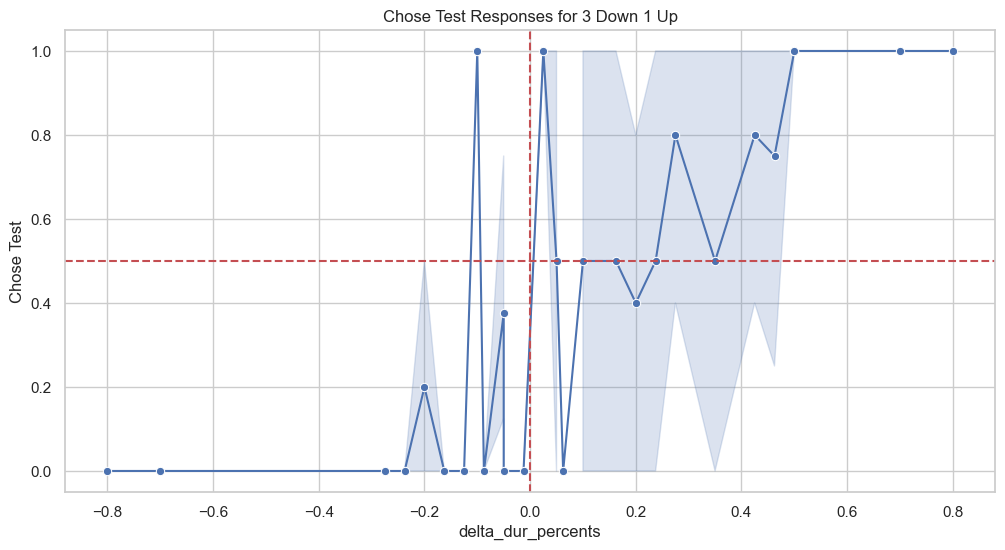

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='delta_dur_percents', y='chose_test', data=data, marker='o')
#plt.plot(data['delta_dur_percents'], data['chose_test'], 'o')
plt.title('Chose Test Responses for 3 Down 1 Up')
#plt.xlabel('Trial')
plt.ylabel('Chose Test')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')

plt.show()